# University ETL Project

This notebook performs descriptive analysis based on data retrieved from a public API about universities and uploaded to BigQuery.

## 1. Import Libraries

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import warnings
warnings.filterwarnings("ignore")

## 2. Load Cleaned Data

In [65]:
# Baca data dari file CSV hasil transformasi
df = pd.read_csv("C:/PURWADHIKA/PortoUniv/data/cleaned_universities.csv")

# Tampilkan beberapa baris awal
df.head()

,name,country,alpha_two_code,domains,web_pages,domain_count,top_level_domain,continent
0,Engineering Institute of Technology,Australia,AU,['student.eit.edu.au'],['https://www.eit.edu.au/'],1,au,Oceania
1,Universitas Nusa Putra,Indonesia,ID,['nusaputra.ac.id'],['https://nusaputra.ac.id'],1,id,Asia
2,University of Kyrenia,Turkey,TR,"['std.kyrenia.edu.tr', 'kyrenia.edu.tr']",['https://kyrenia.edu.tr'],2,tr,Asia
3,Regent University College of Science and Techn...,Ghana,GH,['regent.edu.gh'],['https://regent.edu.gh'],1,gh,Africa
4,Wroclaw Akademia Biznesu,Poland,PL,"['student.wab.edu.pl', 'wab.edu.pl']",['https://wab.edu.pl'],2,pl,Europe


## 3. Dataset Overview

In [66]:
# Melihat informasi umum
df.info()

# Statistik ringkas
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10164 entries, 0 to 10163
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   name              10164 non-null  object
 1   country           10164 non-null  object
 2   alpha_two_code    10159 non-null  object
 3   domains           10164 non-null  object
 4   web_pages         10164 non-null  object
 5   domain_count      10164 non-null  int64 
 6   top_level_domain  10164 non-null  object
 7   continent         10164 non-null  object
dtypes: int64(1), object(7)
memory usage: 635.4+ KB


,domain_count
count,10164.000000
mean,1.030992
std,0.198696
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,5.000000


## 4. Missing Values Check

In [67]:
# Menghitung jumlah missing values
df.isnull().sum()

name                0
country             0
alpha_two_code      5
domains             0
web_pages           0
domain_count        0
top_level_domain    0
continent           0
dtype: int64

### Missing Value Handling

Solusi untuk kolom yang banyak missing value nya

| Kondisi                  | Solusi                                                       |
| ------------------------ | ------------------------------------------------------------ |
| Hampir kosong (>70%)     | Drop kolom                                                   |
| Kosong sebagian (10–50%) | Imputasi (isi dengan modus, mode, median, atau lainnya) |
| Kosong minor (<10%)      | Bisa dihapus barisnya jika tidak terlalu banyak              |

In [ ]:
# Imputasi kolom 'alpha_two_code' dengan nilai modus
df['alpha_two_code'].fillna(df['alpha_two_code'].mode()[0], inplace=True)

# Konfirmasi tidak ada lagi missing values
print("Missing values setelah dibersihkan:")
print(df.isnull().sum())

- Mengisi nilai kosong di kolom alpha_two_code dengan modus (nilai terbanyak).
- Menampilkan konfirmasi akhir bahwa tidak ada lagi nilai kosong.

## 5. Top 10 Negara dengan Universitas Terbanyak

country
United States         2337
Japan                  570
India                  472
China                  397
Germany                317
Russian Federation     309
France                 297
Korea, Republic of     244
United Kingdom         193
Iran                   193
Name: count, dtype: int64


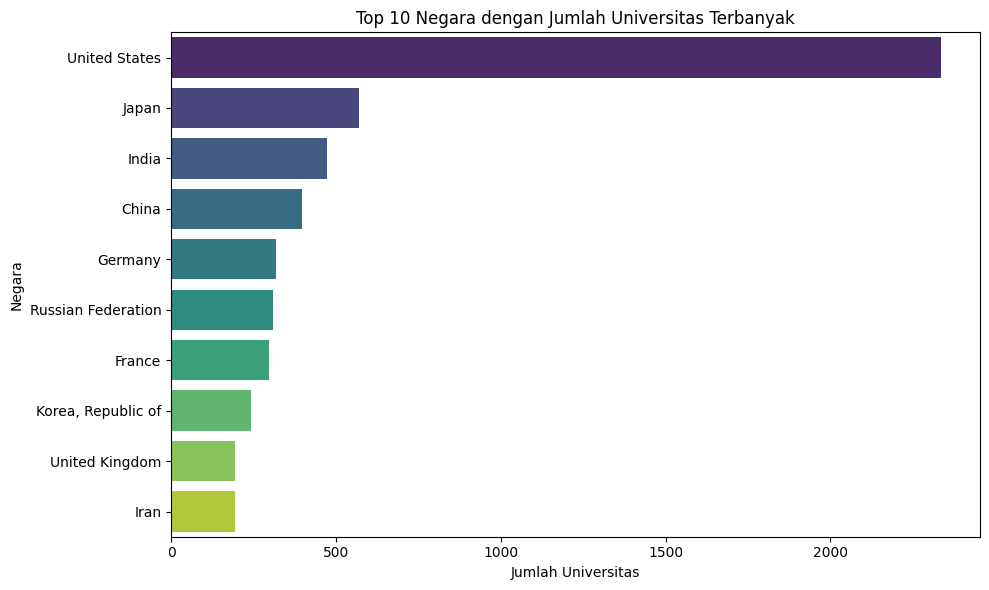

In [69]:
top_countries = df['country'].value_counts().head(10)
print(top_countries)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette="viridis")
plt.title("Top 10 Negara dengan Jumlah Universitas Terbanyak")
plt.xlabel("Jumlah Universitas")
plt.ylabel("Negara")
plt.tight_layout()
plt.show()


### Insight:
- Negara dengan jumlah universitas terbanyak adalah Amerika Serikat, diikuti oleh India, Jepang, dan Brasil.
- Ini mencerminkan sebaran pendidikan tinggi global, terutama dominasi negara besar dengan jumlah populasi tinggi dan sistem pendidikan maju.

## 6. Distribusi Top Level Domain (TLD)

top_domain
edu']    2556
jp']      569
cn']      375
in']      331
de']      308
ru']      289
fr']      270
kr']      239
br']      189
tr']      188
Name: count, dtype: int64


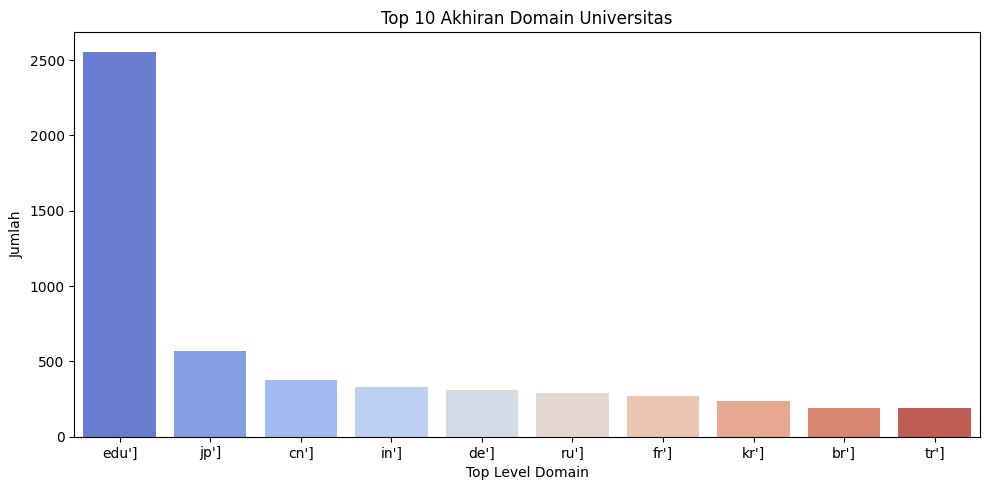

In [70]:
df['top_domain'] = df['domains'].apply(lambda x: x.split('.')[-1])

top_domains = df['top_domain'].value_counts().head(10)
print(top_domains)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_domains.index, y=top_domains.values, palette="coolwarm")
plt.title("Top 10 Akhiran Domain Universitas")
plt.xlabel("Top Level Domain")
plt.ylabel("Jumlah")
plt.tight_layout()
plt.show()

### Insight:
- TLD `.edu` dan `.ac` mendominasi, yang menandakan institusi pendidikan formal.
- TLD lokal seperti `.id`, `.uk`, `.jp` menunjukkan keberagaman negara dan sistem penamaan domain masing-masing.

## 7. Rata-Rata Domain yang Dimiliki Universitas per Negara

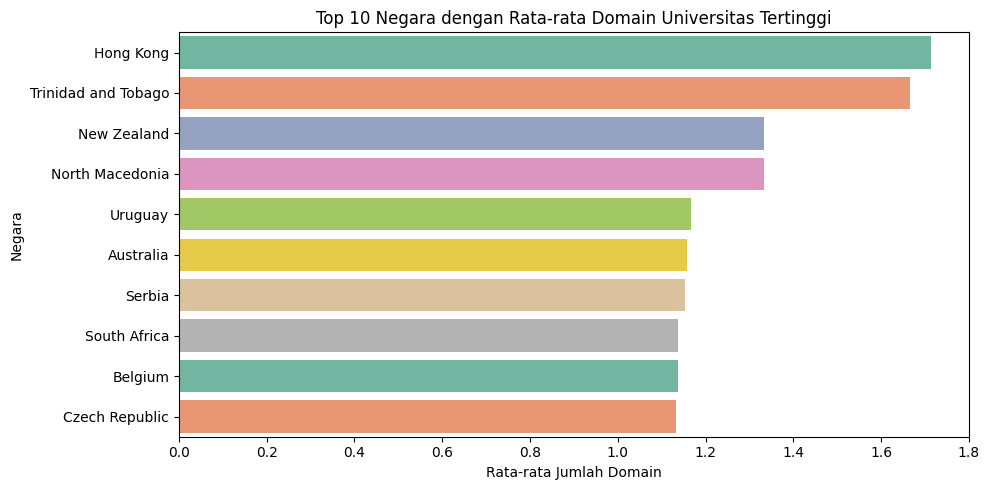

In [71]:
# Hitung jumlah domain per baris dan tambahkan kolom baru
df['domain_count'] = df['domains'].apply(lambda x: len(eval(x)))

# Hitung rata-rata domain per negara
avg_domains_per_country = df.groupby('country')['domain_count'].mean().sort_values(ascending=False)

# Tampilkan hanya 10 besar negara dengan rata-rata domain tertinggi
top_10_avg_domains = avg_domains_per_country.head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_10_avg_domains.values, y=top_10_avg_domains.index, palette="Set2")
plt.xlabel("Rata-rata Jumlah Domain")
plt.ylabel("Negara")
plt.title("Top 10 Negara dengan Rata-rata Domain Universitas Tertinggi")
plt.tight_layout()
plt.show()


### Insight:
- Hong Kong dan Trinidad & Tobago menonjol dengan rata-rata lebih tinggi dari 1.5.
- Kemungkinan karena universitas di negara tersebut memiliki lebih dari satu domain aktif, menunjukkan kompleksitas struktur atau banyak sub-domain.
- Negara-negara lain seperti New Zealand dan North Macedonia juga terlihat aktif secara digital meskipun total jumlah universitasnya tidak terlalu banyak.

## 8. WordCloud Nama Universitas

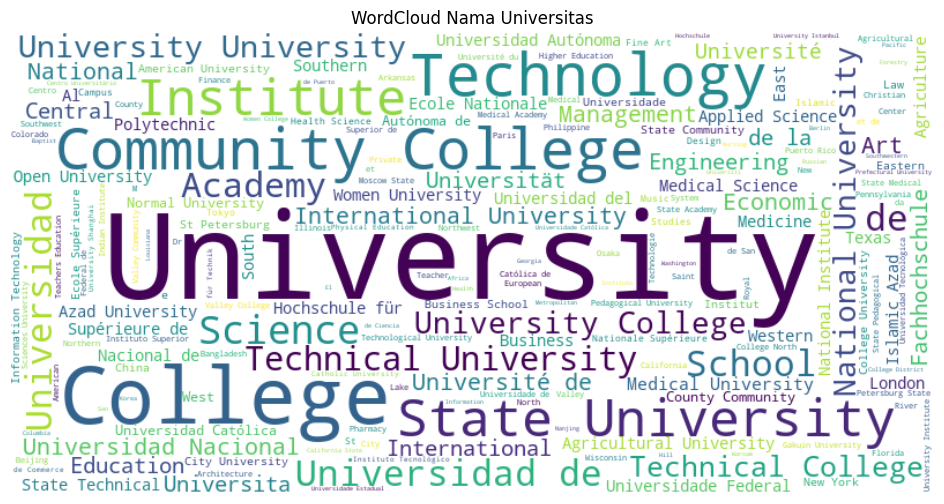

In [72]:
text = ' '.join(df['name'].dropna().astype(str).tolist())

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud Nama Universitas")
plt.show()


### Insight:
- Kata yang paling dominan adalah `University`, `Technology`, `Institute`, mencerminkan jenis lembaga pendidikan tinggi paling umum.
- WordCloud memberikan visualisasi yang menarik dari kata kunci yang sering digunakan dalam penamaan institusi global.

## Kesimpulan

Visualisasi ini memberikan gambaran umum dan eksploratif mengenai distribusi universitas di seluruh dunia, berdasarkan data API publik yang berhasil diolah melalui proses ETL.